<Figure size 1200x400 with 0 Axes>

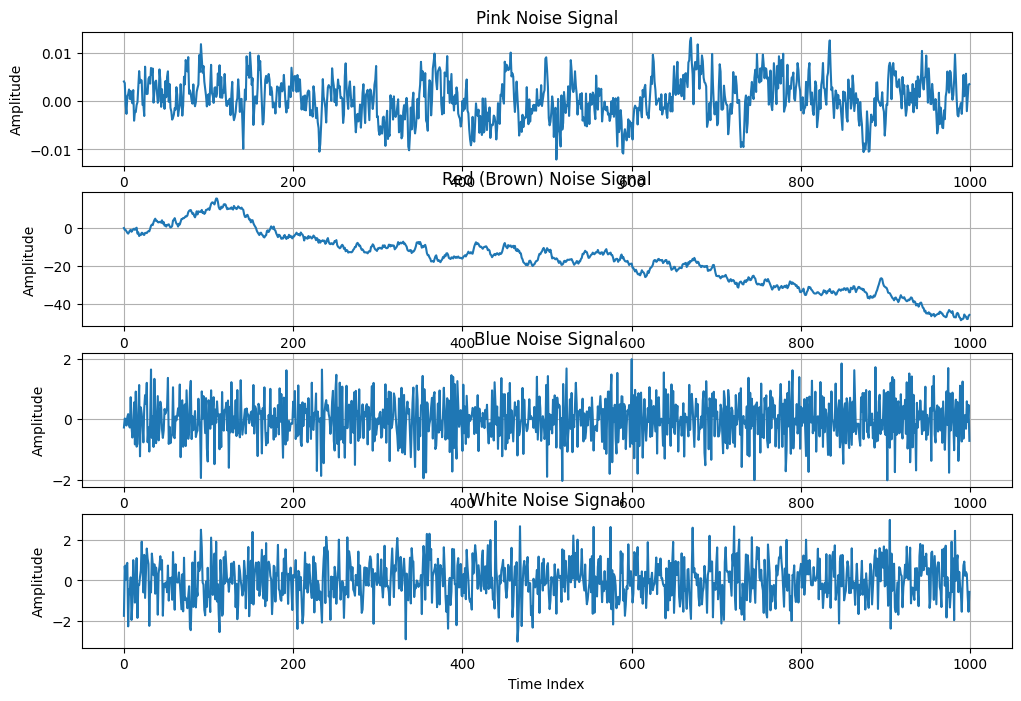

In [9]:
## create a white noise signal and plot it
import numpy as np  
import matplotlib.pyplot as plt

# create a white noise signal
np.random.seed(0)
N = 1000
x = np.random.randn(N)

# plot the signal
plt.figure(figsize=(12, 4))

# Function to generate pink noise
def pink_noise(N):
    uneven = N % 2
    X = np.random.randn(N//2+1+uneven) + 1j * np.random.randn(N//2+1+uneven)
    S = np.sqrt(np.arange(len(X)) + 1.)  # +1 to avoid divide by zero
    y = (np.fft.irfft(X/S)).real
    if uneven:
        y = y[:-1]
    return y

# Function to generate red (brown) noise
def red_noise(N):
    return np.cumsum(np.random.randn(N))

# Function to generate blue noise
def blue_noise(N):
    uneven = N % 2
    X = np.random.randn(N//2+1+uneven) + 1j * np.random.randn(N//2+1+uneven)
    S = np.sqrt(np.arange(len(X)))  # no +1 here
    y = (np.fft.irfft(X*S)).real
    if uneven:
        y = y[:-1]
    return y
# BEGIN: white_noise function
def white_noise(N):
    return np.random.randn(N)


# Generate different noise signals
pink = pink_noise(N)
red = red_noise(N)
blue = blue_noise(N)
x = white_noise(N)
# Plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(pink)
plt.title('Pink Noise Signal')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(4, 1, 2)
plt.plot(red)
plt.title('Red (Brown) Noise Signal')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(blue)
plt.title('Blue Noise Signal')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.grid()


plt.subplot(4,1,4)
plt.plot(x)
plt.title('White Noise Signal')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


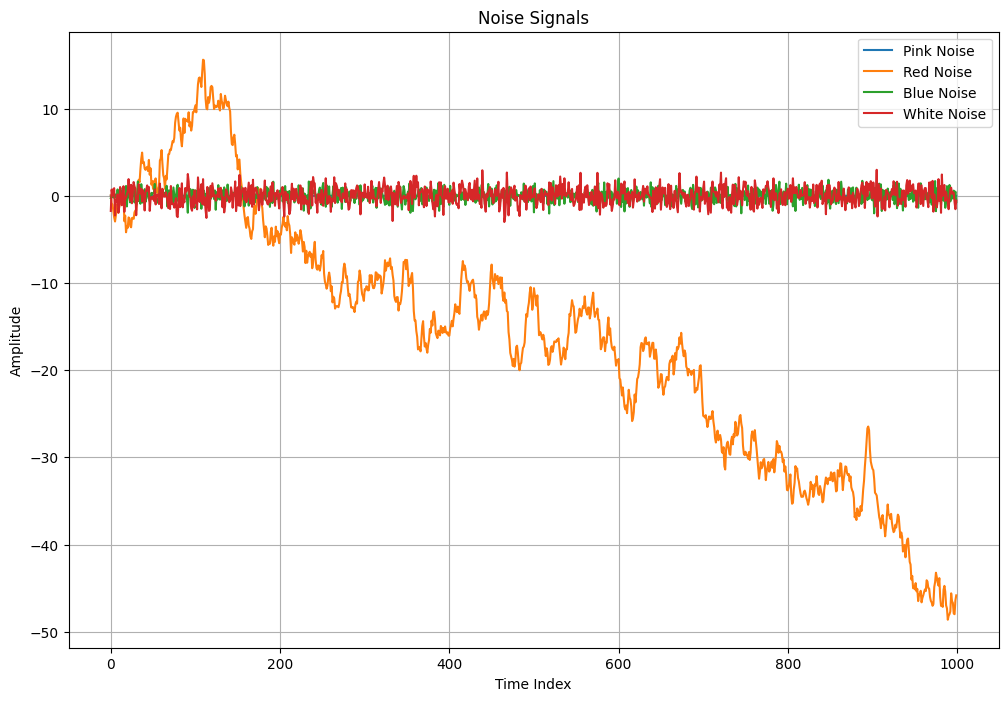

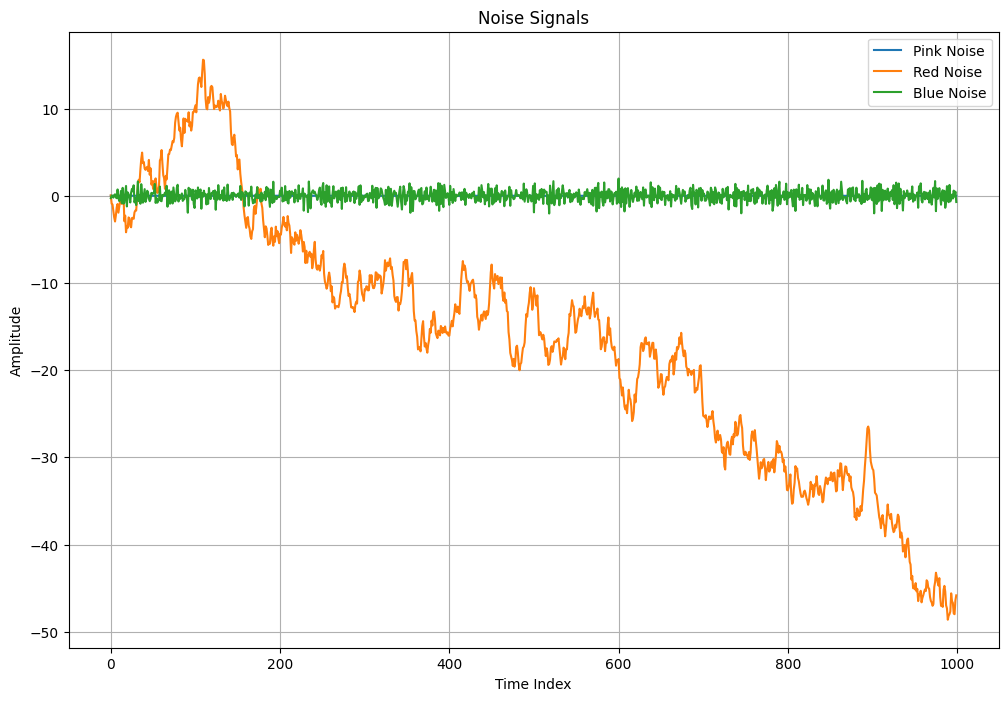

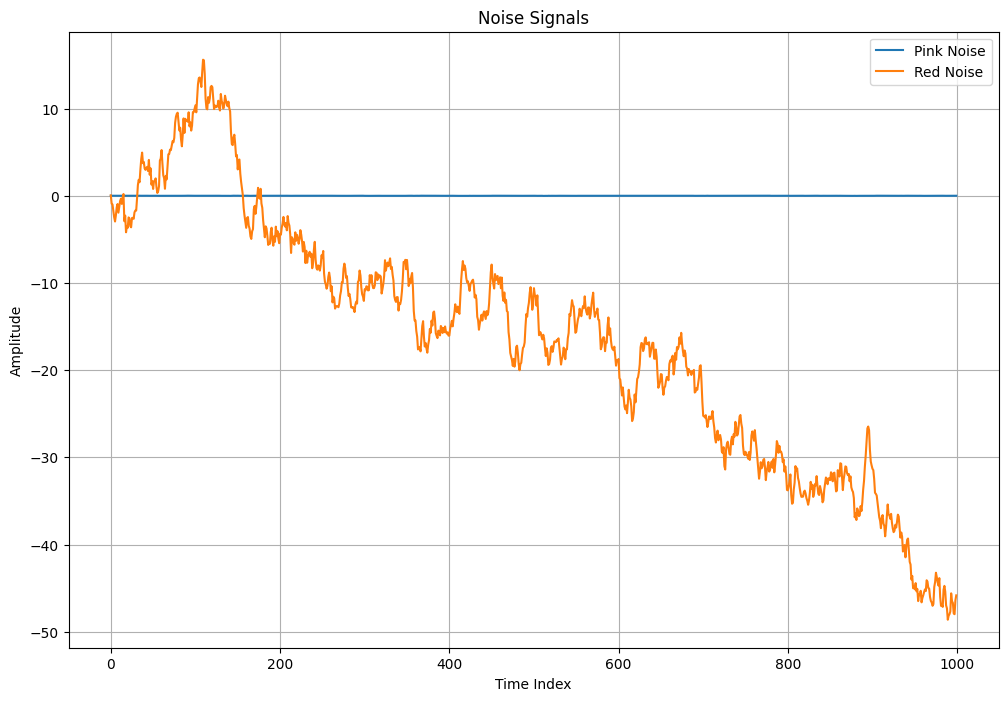

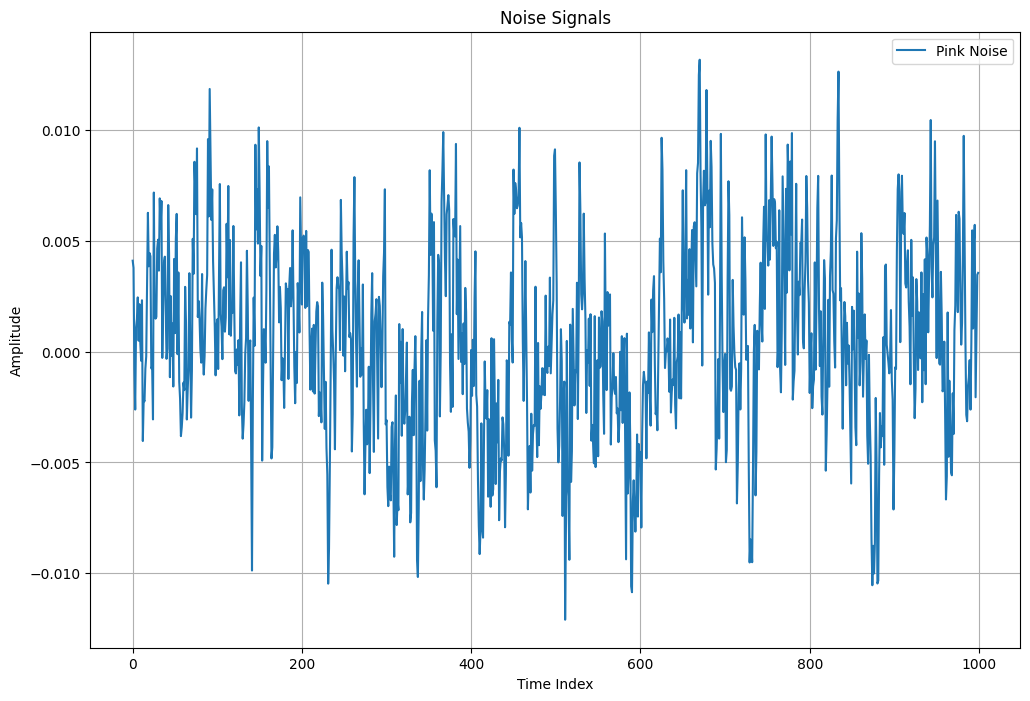

C:\Users\beren\AppData\Local\Temp\ipykernel_34344\234686975.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


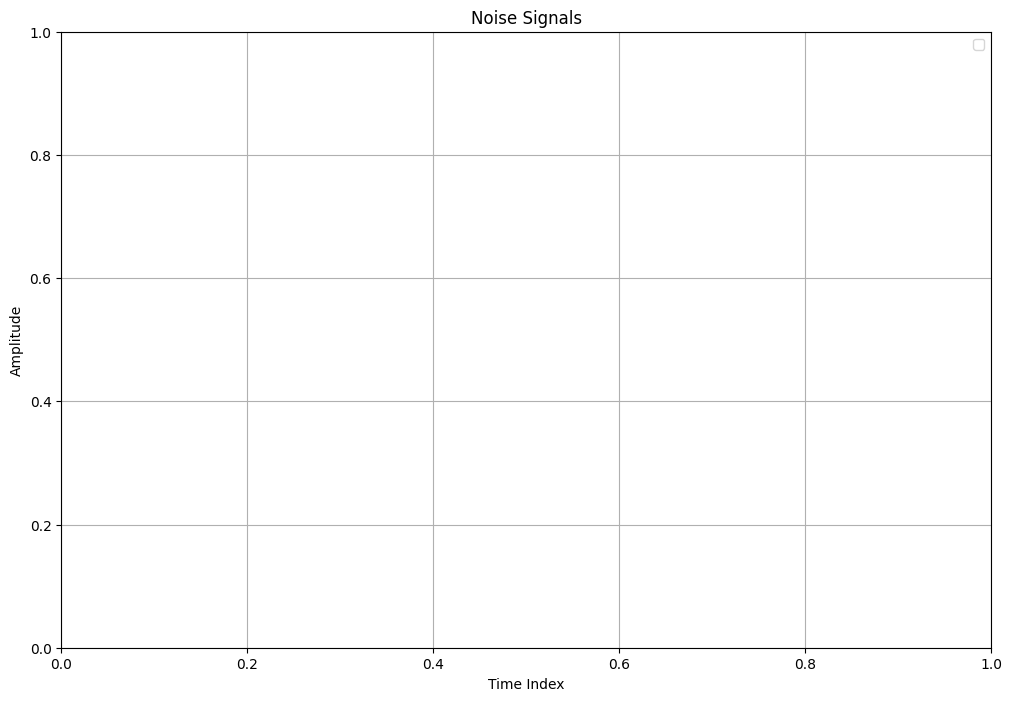

In [11]:
import ipywidgets as widgets
from IPython.display import display


# Function to update the plot based on selected noise types
def update_plot(noise_types):
    plt.figure(figsize=(12, 8))
    
    if 'Pink Noise' in noise_types:
        plt.plot(pink, label='Pink Noise')
    if 'Red Noise' in noise_types:
        plt.plot(red, label='Red Noise')
    if 'Blue Noise' in noise_types:
        plt.plot(blue, label='Blue Noise')
    if 'White Noise' in noise_types:
        plt.plot(x, label='White Noise')
    
    plt.title('Noise Signals')
    plt.xlabel('Time Index')
    plt.ylabel('Amplitude')
    # Function to update the plot based on selected noise type


# Create checkboxes for noise types
noise_options = ['Pink Noise', 'Red Noise', 'Blue Noise', 'White Noise']
checkboxes = [widgets.Checkbox(value=True, description=option) for option in noise_options]

# Create a function to get the selected noise types
def get_selected_noise_types(*args):
    selected_noise_types = [checkbox.description for checkbox in checkboxes if checkbox.value]
    update_plot(selected_noise_types)

# Link checkboxes to the update function
for checkbox in checkboxes:
    checkbox.observe(get_selected_noise_types, 'value')

# Display checkboxes
checkbox_box = widgets.VBox(checkboxes)
display(checkbox_box)

# Initial plot
update_plot(noise_options)

Dropdown(description='Noise Type:', options=('Pink Noise', 'Red Noise', 'Blue Noise', 'White Noise'), value='P…

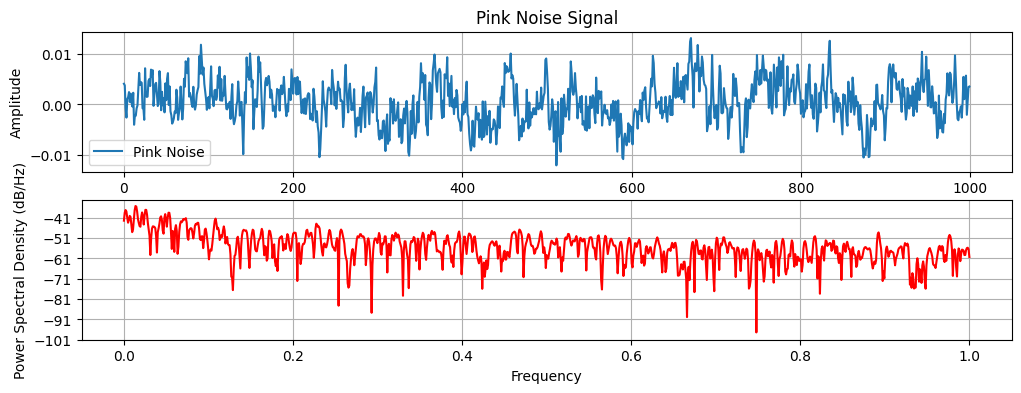

In [15]:
# Create a dropdown menu for noise types
dropdown = widgets.Dropdown(
    options=noise_options,
    value='Pink Noise',
    description='Noise Type:',
)

# Function to update the plot based on selected noise type
def update_plot_dropdown(change):
    noise_type = change['new']
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    
    if noise_type == 'Pink Noise':
        plt.plot(pink, label='Pink Noise')
    elif noise_type == 'Red Noise':
        plt.plot(red, label='Red Noise')
    elif noise_type == 'Blue Noise':
        plt.plot(blue, label='Blue Noise')
    elif noise_type == 'White Noise':
        plt.plot(x, label='White Noise')
    
    plt.title(f'{noise_type} Signal')
    plt.xlabel('Time Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.psd(pink, NFFT=2048, Fs=2, color='r', label='Pink Noise')

# Link dropdown to the update function
dropdown.observe(update_plot_dropdown, names='value')

# Display dropdown
display(dropdown)

# Initial plot
update_plot_dropdown({'new': dropdown.value})

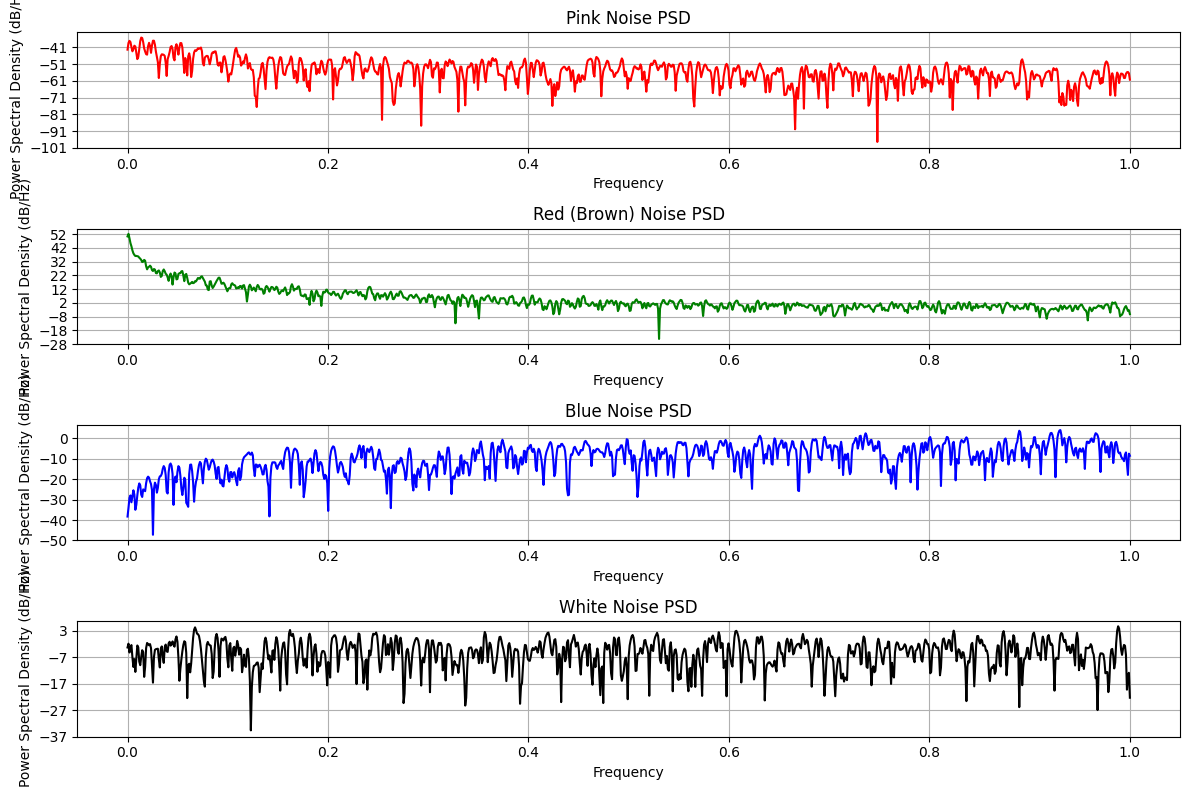